<a href="https://colab.research.google.com/github/RahafSobh/RahafSobh/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Frequencies of phrases ===
online_course       71
lecture             34
assignment          91
quiz                80
final_exam          40
discussion_forum    94
video_lesson        94
zoom_meeting        43
recording           22
slides              41
tutorial            72
project             21
group_work          49
deadline            57
office_hours        21
feedback            83
grade               79
syllabus            40
reading             52
exercise            95
Name: frequency, dtype: int64

=== Co-occurrence matrix (counts) ===
                  online_course  lecture  assignment  quiz  final_exam  \
online_course                 0       21          48    58          27   
lecture                      21        0          25     1          19   
assignment                   48       25           0    73          35   
quiz                         58        1          73     0          40   
final_exam                   27       19          35    40           0

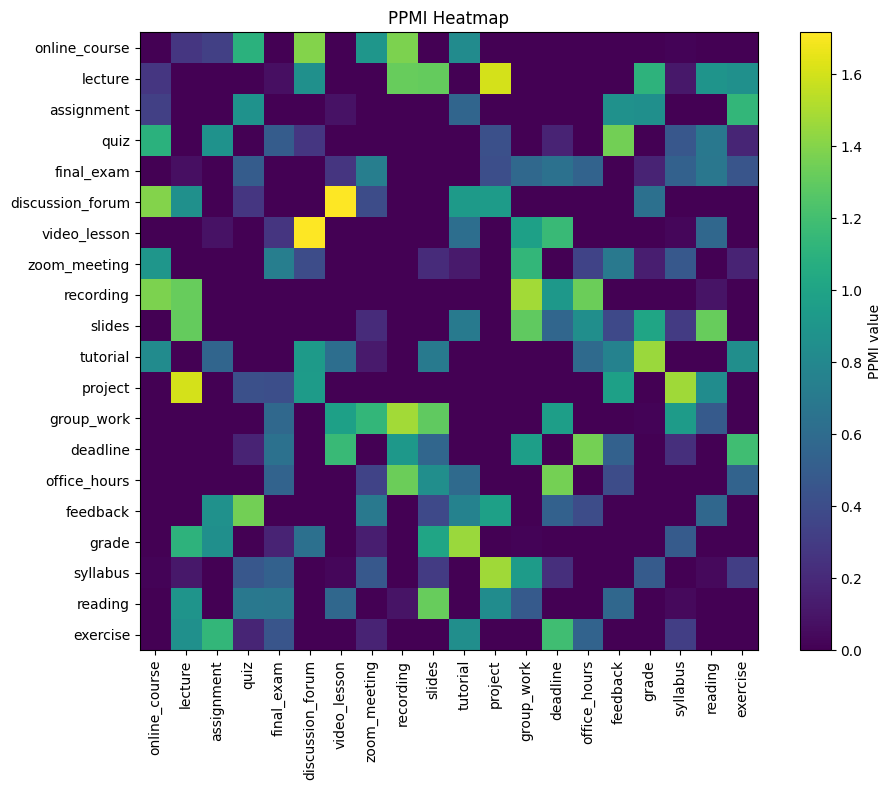

=== Top 10 pairs by PPMI ===
             phrase_1          phrase_2      PPMI
85   discussion_forum      video_lesson  1.716979
28            lecture           project  1.605509
127         recording        group_work  1.476334
159           project          syllabus  1.474181
150          tutorial             grade  1.461925
4       online_course  discussion_forum  1.399250
7       online_course         recording  1.381092
169          deadline      office_hours  1.358309
65               quiz          feedback  1.350292
129         recording      office_hours  1.331352


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



phrases = [
    "online_course", "lecture", "assignment", "quiz", "final_exam",
    "discussion_forum", "video_lesson", "zoom_meeting", "recording",
    "slides", "tutorial", "project", "group_work", "deadline",
    "office_hours", "feedback", "grade", "syllabus", "reading", "exercise"
]

np.random.seed(42)

n = len(phrases)


freq = np.random.randint(20, 101, size=n)
freq_series = pd.Series(freq, index=phrases, name="frequency")

print("=== Frequencies of phrases ===")
print(freq_series)
print()



cooc_matrix = np.zeros((n, n), dtype=int)

for i in range(n):
    for j in range(i + 1, n):
        max_shared = min(freq[i], freq[j])
        shared = np.random.randint(0, max_shared + 1)  # כולל max_shared
        cooc_matrix[i, j] = shared
        cooc_matrix[j, i] = shared


np.fill_diagonal(cooc_matrix, 0)

cooc_df = pd.DataFrame(cooc_matrix, index=phrases, columns=phrases)

print("=== Co-occurrence matrix (counts) ===")
print(cooc_df)
print()



# N = סך כל המופעים המשותפים
N = cooc_matrix.sum()
print(f"Total shared occurrences N = {N}")
print()

row_sums = cooc_matrix.sum(axis=1)   # shape: (n,)
col_sums = cooc_matrix.sum(axis=0)   # shape: (n,)

# הסתברויות שוליות
P_wi = row_sums / N    # P(w_i)
P_wj = col_sums / N    # P(w_j)

# הסתברויות משותפות
P_wi_wj = cooc_matrix / N  # P(w_i, w_j)


P_wi = P_wi.astype(float)
P_wj = P_wj.astype(float)
P_wi_wj = P_wi_wj.astype(float)


ppmi_matrix = np.zeros((n, n), dtype=float)


for i in range(n):
    for j in range(n):
        if cooc_matrix[i, j] == 0:
            ppmi_matrix[i, j] = 0.0
        else:
            p_ij = P_wi_wj[i, j]
            p_i = P_wi[i]
            p_j = P_wj[j]
            # PMI = log2( P(i,j) / (P(i)*P(j)) )
            pmi = np.log2(p_ij / (p_i * p_j))
            # PPMI = max(0, PMI)
            ppmi_matrix[i, j] = max(0.0, pmi)

ppmi_df = pd.DataFrame(ppmi_matrix, index=phrases, columns=phrases)

print("=== PPMI matrix ===")
print(ppmi_df.round(3))
print()



plt.figure(figsize=(10, 8))
plt.imshow(ppmi_matrix, interpolation='nearest')
plt.title("PPMI Heatmap")
plt.colorbar(label="PPMI value")
plt.xticks(ticks=np.arange(n), labels=phrases, rotation=90)
plt.yticks(ticks=np.arange(n), labels=phrases)
plt.tight_layout()
plt.show()


pairs = []
for i in range(n):
    for j in range(i + 1, n):
        pairs.append((phrases[i], phrases[j], ppmi_matrix[i, j]))

pairs_df = pd.DataFrame(pairs, columns=["phrase_1", "phrase_2", "PPMI"])
pairs_df_sorted = pairs_df.sort_values(by="PPMI", ascending=False)

print("=== Top 10 pairs by PPMI ===")
print(pairs_df_sorted.head(10))
